# Exploratory Data Analysis (EDA) of the **CBIS-DDSM** Dataset
In this section, we conduct an exploratory data analysis of the CBIS-DDSM Case and DICOM datasets prepared in prior sections. The purpose of this EDA is four-fold:
1. Discover the relationships among the variables.
2. Understand the nature and degree to which the variables pertain to the diagnosis of breast cancer.
3. Identify errors, outliers, and anomalies in the data before the modeling stage.
4. Assess image quality for image data pre-processing.

## The Datasets
The scope of this EDA includes the following datasets:
- Case Datasets: Calcification and mass datasets containing patient, abnormality, BI-RADS assessment, image view, breast density, subtlety, and pathology (diagnosis) information.
- DICOM Dataset: Contains image properties, such as image size, shape, bit-depth, aspect ratio, and photometric interpretation.
- DICOM Images: The mammography, ROI masks, and cropped images in DICOM format.

### Case Dataset Dictionary

| #  | Variable             | Type        | Description                                                                                                                  | Validity                                   |
|----|----------------------|-------------|------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|
| 1  | patient_id           | Nominal     | Unique identifier for each patient.                                                                                          | String of format "P_00000'                 |
| 2  | breast_density       | Discrete    | BI-RADS overall assessment of the volume of attenuating tissues in the   breast.                                             | Integer range [1,4]                        |
| 3  | left_or_right_breast | Nominal     | Which breast was imaged.                                                                                                     | RIGHT or LEFT                              |
| 4  | image_view           | Dichotomous | Either craniocaudal or mediolateral oblique view.                                                                            | CC or MLO                                  |
| 5  | abnormality_id       | Discrete    | Number of abnormality for the patient.                                                                                       | Integer                                    |
| 6  | abnormality_type     | Dichotomous | BI-RADS category of the abnormality.                                                                                         | calcification or mass                      |
| 7  | calc_type            | Nominal     | Characterization of the type of calcification (where applicable)                                                             | See appendix                               |
| 8  | calc_distribution    | Nominal     | The arrangement of the calcifications inside the breast and, relative to   the probability of malignancy. (where applicable) | See appendix                               |
| 9  | assessment           | Discrete    | Overall BI-RADS assessment of the mammography                                                                                | Integer range [0,6]                        |
| 10 | pathology            | Nominal     | Determination of the malignancy of the case.                                                                                 | MALIGNANT, BENIGN, BENIGN_WITHOUT_CALLBACK |
| 11 | subtlety             | Discrete    | Degree of diagnostic difficulty                                                                                              | Integer range [1,5]                        |
| 12 | fileset              | Nominal     | Indicates training or test set.                                                                                              | train or test                              |
| 13 | mass_shape           | Nominal     | Shape of the mass                                                                                                            | See appendix                               |
| 14 | mass_margins         | Nominal     | Feature that separates the mass from the adjacent breast parenchyma.                                                         | See appendix                               |
| 15 | case_id              | Nominal     | Unique identifier for the case.                                                                                              | String                                     |
| 16 | cancer               | Dichotomous | Indicates whether the cancer is diagnosed.                                                                                   | True or False                              |

### DICOM Dataset Dictionary
| #  | Variable                   | Type        | Description                                                               |
|----|----------------------------|-------------|---------------------------------------------------------------------------|
| 1  | series_uid                 | Nominal     | Unique identifier for a series of images.                                 |
| 2  | filepath                   | Nominal     | The path to the image.                                                    |
| 3  | patient_id                 | Nominal     | Unique identifier for each patient.                                       |
| 4  | side                       | Nominal     | Which breast was imaged.                                                  |
| 5  | image_view                 | Dichotomous | Either craniocaudal or mediolateral oblique view.                         |
| 6  | photometric_interpretation | Nominal     | Intended interpretation of the pixel data.                                |
| 7  | samples_per_pixel          | Discrete    | Number of samples (planes) in this image.                                 |
| 8  | height                     | Discrete    | Number of rows in the image.                                              |
| 9  | width                      | Discrete    | Number of columns in the image.                                           |
| 10 | size                       | Discrete    | Number of pixels in the image.                                            |
| 11 | aspect_ratio               | Continuous  | Ratio of vertical and horizontal size.                                    |
| 12 | bits                       | Discrete    | Number of bits stored for each pixel sample.                              |
| 13 | smallest_image_pixel       | Discrete    | The minimum actual pixel value encountered in the image.                  |
| 14 | largest_image_pixel        | Discrete    | The maximum actual pixel value encountered in the image.                  |
| 15 | image_pixel_range          | Discrete    | Difference between largest and smallest image pixel.                      |
| 16 | brisque                    | Continuous  | BRISQUE score indicating overall quality of the image.                    |
| 17 | series_description         | Nominal     | Whether the series contains full mammography, ROI mask or cropped images. |


## Guiding Questions
> “Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.” — John Tukey

Here, we'll put forward a set of questions to motivate and guide the discovery process.

**General Questions**
1. Density is considered a potential signal of pathology. How does density relate to BI-RADS assessment and pathology in the CBIS-DDSM dataset?
2. Are abnormalities considered more subtle in dense breasts? 
4. Is breast density determinative of abnormality type, to some degree?
5. Are masses more or less subtle than calcification abnormalities?
7. To what degree are the BI-RADS assessments and pathology in agreement?
8. Does subtlety affect the agreement between BI-RADS assessment and pathology?

**Calcification Cases**
1. Which calcification types are most malignant?
2. How do calcification type and distribution relate to pathology?
3. What does the calcification distribution imply about a diagnosis?
4. To what degree does calcification distribution relate to breast density? 
5. Are certain calcification types more or less subtle than others?
6. To what degree are subtlety and calcification distribution related?

**Mass Cases**
1. How does mass shape relate to pathology?
2. To what degree do mass shape and mass margins affect a BI-RADS assessment? Pathology?
3. What is the relationship between subtlety and mass shape? Mass margins?
4. Do the data support a relationship between breast density and mass shape? mass margins?

**Image Properties**
1. What is the overall quality of the images in the dataset?
2. What is the distribution of the image sizes in terms of height and width?
3. Is bit-depth consistent across all images? Full mammograms? ROI Masks?
4. Is photometric interpretation consistent across all full mammogram images? ROI masks?
5. To what degree are image and ROI mask sizes in agreement?

**Images**
1. To what degree are artifacts (marks and texts) extant in the imaging?
2. How would image brightness and contrast be characterized in the dataset?
3. Is visual intra-class dissimilarity and inter-class similarity a factor among benign calcifications, benign masses, malignant calcifications, and malignant masses?


## Exploratory Data Analysis Plan
The EDA will be conducted in six stages:

| Stage | Dataset        | Analysis     | Focus                                                                                                  |
|-------|----------------|--------------|--------------------------------------------------------------------------------------------------------|
| 1     | Case           | Univariate   | Explore descriptive statistics for each variable in the datasets   separately.                         |
| 2     | Case           | Bivariate    | Analyze pairwise relationships between variables.                                                      |
| 3     | Case           | Multivariate | Evaluate the relationships among multiple variables (more than two) and   patterns.                    |
| 4     | DICOM Metadata | Quality      | Assessment of overall quality of images.                                                               |
| 5     | DICOM Metadata | Structure    | Analyze the image sizes, shape and pixel values.                                                       |
| 6     | DICOM Images   | Visual       | Conduct visual analysis of various abnormalities, densities, and   diagnoses.                          |

## Preliminaries
The section has the following python package dependencies:
- **Pandas**: Tabular data processing and analysis
- **Numpy**: Numerical processing
- **Matplotlib** and **Seaborn**: Data visualization
- **Scipy**: Statistical analysis
- **StudioAI**: Data visualization and statistical analysis 

In [1]:
import sys
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from scipy import stats
from IPython.display import display_html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from studioai.stats.inferential.cramersv import CramersVAnalysis
from studioai.stats.inferential.kendallstau import KendallsTauAnalysis

from bcd.data.dataset.case import CaseDataset
from bcd.data.dataset.dicom import DicomDataset

sns.set_style('whitegrid')
sns.set_palette("Blues_r")

In [3]:
CASE_FP = "data/staged/case.csv"
CALC_FP = "data/staged/calc_cases.csv"
MASS_FP = "data/staged/mass_cases.csv"
DICOM_FP = "data/staged/dicom.csv"

In [4]:
cases = CaseDataset(filepath=CASE_FP)
calc = CaseDataset(filepath=CALC_FP)
mass = CaseDataset(filepath=MASS_FP)

## Case Data Univariate Analysis
Let's get an overall sense of the data

In [5]:
summary = cases.summary()
summary

,Summary
Patients,1566
Cases,3568
Calcification Cases,1872
Calcification Cases - Benign,1199
Calcification Cases - Malignant,673
Mass Cases,1696
Mass Cases - Benign,912
Mass Cases - Malignant,784


In [6]:
st = summary.T
pct_calc = round(st['Calcification Cases'] / st['Cases'] * 100,2).values[0]
pct_mass = round(st['Mass Cases'] / st['Cases'] * 100,2).values[0]
pct_calc_mal = round(st['Calcification Cases - Malignant'] / st['Calcification Cases'] * 100,2).values[0]
pct_calc_bn = round(st['Calcification Cases - Benign'] / st['Calcification Cases'] * 100,2).values[0]
pct_mass_mal = round(st['Mass Cases - Malignant'] / st['Mass Cases'] * 100,2).values[0]
pct_mass_bn = round(st['Mass Cases - Benign'] / st['Mass Cases'] * 100,2).values[0]
cases_per_patient = round(st['Cases'] / st['Patients'],2).values[0]
msg = f"Key Observations\n"
msg += f"1.\tThe number of patients, {st['Patients'].values[0]} comports with the TCIA data description.\n"
msg += f"2.\tWe have {st['Cases'].values[0]} cases, {pct_calc}% are calcification cases and {pct_mass}% are mass cases.\n"
msg += f"3.\tOf the calcification cases, {pct_calc_bn}% are benign, {pct_calc_mal} or malignant.\n"
msg += f"4.\tOf the mass cases, {pct_mass_bn}% are benign, {pct_mass_mal} or malignant.\n"
msg += f"5\tOn average we have approximately {cases_per_patient} cases per patient."
print(msg)

Key Observations
1.	The number of patients, 1566 comports with the TCIA data description.
2.	We have 3568 cases, 52.47% are calcification cases and 47.53% are mass cases.
3.	Of the calcification cases, 64.05% are benign, 35.95 or malignant.
4.	Of the mass cases, 53.77% are benign, 46.23 or malignant.
5	On average we have approximately 2.28 cases per patient.



Let's take a look at the calcification and mass data.

In [7]:
calc.head()
mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,fileset,case_id,cancer
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,train,P_00005_RIGHT_calcification_CC_1,True
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,train,P_00005_RIGHT_calcification_MLO_1,True
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,train,P_00007_LEFT_calcification_CC_1,False
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,train,P_00007_LEFT_calcification_MLO_1,False
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,train,P_00008_LEFT_calcification_CC_1,False


,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,assessment,pathology,subtlety,fileset,mass_shape,mass_margins,case_id,cancer
0,P_00001,3,LEFT,CC,1,mass,4,MALIGNANT,4,train,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,P_00001_LEFT_mass_CC_1,True
1,P_00001,3,LEFT,MLO,1,mass,4,MALIGNANT,4,train,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,P_00001_LEFT_mass_MLO_1,True
2,P_00004,3,LEFT,CC,1,mass,4,BENIGN,3,train,ARCHITECTURAL_DISTORTION,ILL_DEFINED,P_00004_LEFT_mass_CC_1,False
3,P_00004,3,LEFT,MLO,1,mass,4,BENIGN,3,train,ARCHITECTURAL_DISTORTION,ILL_DEFINED,P_00004_LEFT_mass_MLO_1,False
4,P_00004,3,RIGHT,MLO,1,mass,4,BENIGN,5,train,OVAL,CIRCUMSCRIBED,P_00004_RIGHT_mass_MLO_1,False


### Breast Density
Radiologists classify breast density using a 4-level density scale {cite}BreastImagingReporting:

1. Almost entirely fatty
2. Scattered areas of fibroglandular density
3. Heterogeneously dense
4. Extremely dense

According to the American College of Radiology™️, breast density in the U.S.:

- 10% of women have almost entirely fatty breasts,
- 10% have extremely dense breasts,
- 40% of women have scattered areas of fibroglandular density
- 40% have heterogeneously dense breasts

{figure}
:name: density_ref
Breast Density Categories {cite}`WHATAREDENSE`

In [8]:
d1 = np.repeat([1], 357)
d2 = np.repeat([2], 1427)
d3 = np.repeat([3], 1427)
d4 = np.repeat([4], 357)
d = np.append(arr=d1,values=d2)
d = np.append(arr=d,values=d3)
d = np.append(arr=d,values=d4)
d = {"Breast Density": d, "Sample": "U.S."}
usd = pd.DataFrame(data=d)
df = cases.as_df()
density = df['breast_density'].to_frame()
density.rename(columns={'breast_density': 'Breast Density'}, inplace=True)
density['Sample'] = 'CBIS-DDSM'
density = pd.concat([density, usd], axis=0).reset_index()

The following exhibits the counts by breast density category in the CBIS-DDSM dataset vis-a-vis a sample from the US of the same size.

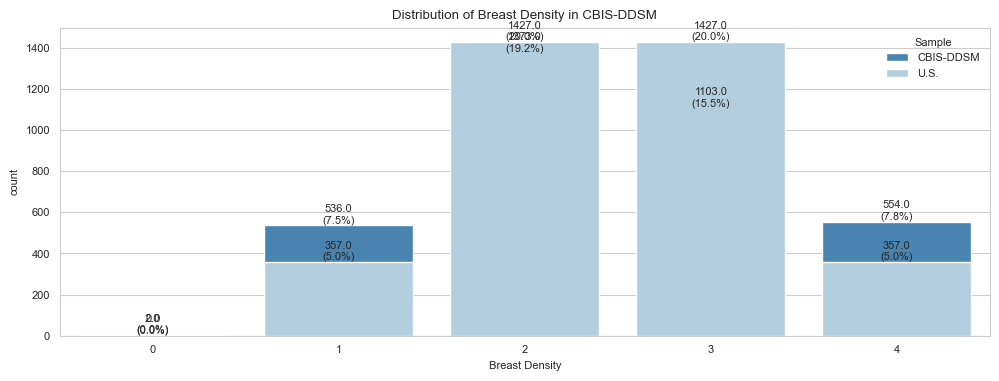

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
cases.plot.countplot(data=density,x='Breast Density', hue="Sample", ax=ax, title ="Distribution of Breast Density in CBIS-DDSM", dodge=True)